# Position data analysis

-107.6
-0.2
-0.5
-0.7
-1.0
-1.2
-1.3
-1.4
-1.6
-1.7
-1.9
-2.0
-2.1
-2.2
-2.3
-2.6
-2.8
-3.0
-3.1
-3.3
-3.4
-3.5
-3.6
-3.6
-3.6
-3.5
-3.4
-3.3
-3.2
-3.1
-3.1
-3.0
-3.0
-3.0
-3.0
-2.9
-2.8
-2.8
-3.0
-3.1
-2.8
-2.7
-2.5
-2.3
-2.1
-2.0
-1.8
-1.7
-1.7
-1.6
-1.7
-1.7
-1.5
-1.5
-1.4
-1.3
-1.1
-1.0
-0.8
-0.6
-0.5
-0.4
-0.4
-0.5
-0.7
-0.8
-1.0
-1.2
-1.4
-1.6
-1.8
-2.1
-2.3
-2.5
-2.6
-2.8
-2.9
-3.1
-3.4
-3.4
-3.4
-3.4
-3.5
-3.6
-3.7
-3.9
-4.1
-4.3
-4.2
-4.0
-3.9
-3.8
-3.6
-3.5
-3.5
-3.5
-3.4


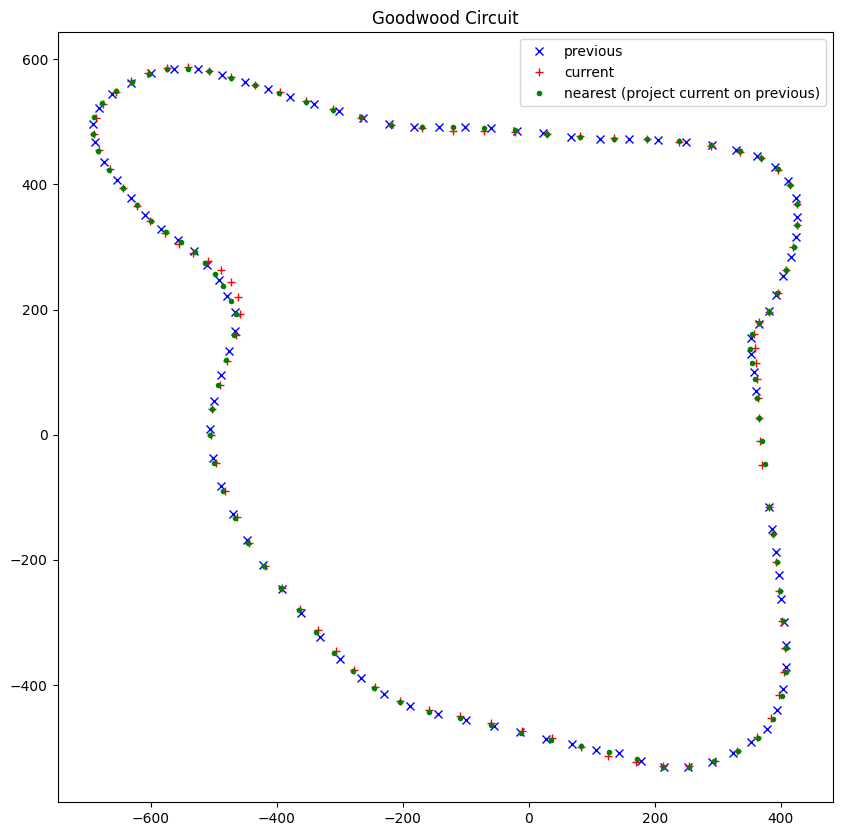

In [3]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import mpld3
from scipy.spatial import KDTree
from shapely.geometry import LineString, Point
from shapely.ops import nearest_points

mpld3.enable_notebook()


with open("track-positions-lap-1.pickle", "rb") as f:
    prev_track_positions = pickle.load(f)

with open("track-positions-lap-2.pickle", "rb") as f:
    current_track_positions = pickle.load(f)

points = list(prev_track_positions.keys())
track = KDTree(points)


fig, ax = plt.subplots(figsize=(10, 10))

plt.title("Goodwood Circuit")

MAX = len(prev_track_positions)
STEP = 64
###############################################################
##############  Position points of previous Lap  ##############
###############################################################
previous = list(zip(*points))
prev_x = previous[0] 
prev_y = [-1 * d for d in previous[1]]
ax.plot(
    prev_x[0:MAX:STEP],
    prev_y[0:MAX:STEP],
    color="blue",
    marker="x",
    label="previous",
    linestyle="None",
)

###############################################################
##############  Position points of current Lap  ###############
###############################################################
for i in range(0, MAX, STEP):
    pos = list(current_track_positions)[i]

    curr_position = Point(pos[0], pos[1])
    ax.plot(
        curr_position.x,
        -curr_position.y,
        color="red",
        marker="+",
        label="current",
        linestyle="None",
    )
###################################################################
########  Nearest position point of current lap to previous #######
###################################################################
    dist, ind = track.query((curr_position.x, curr_position.y), k=1)

    # print(f"KD tree -- distance: {dist}, index: {ind}, coord: {points[ind]}")
    
    ax.plot(
        points[ind][0], # nearest.x,
        -points[ind][1], # nearest.y,
        color="green",
        marker=".",
        label="nearest (project current on previous)",
        linestyle="None",
    )
    # print(f"previous (a): {list(prev_track_positions)[i]}")
    # print(f"previous (b): {tx[i]}, {ty[i]}")
    # print(f"current: {list(current_track_positions)[i]}")
    # print(f"nearest: {nearest.x}, {nearest.y}")
    # print("\n")

    delta_laptime = 0
    if (points[ind][0], points[ind][1]) in points:
        delta_laptime = current_track_positions[pos] - prev_track_positions[points[ind]]
    estimated_laptime = f"{delta_laptime:.1f}"
    print(estimated_laptime)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

plt.show()


In [1]:
import datetime
import pickle

import matplotlib.pyplot as plt
import numpy as np

WIDTH = 70
CIRCUIT_NAME = "nordschleife-lap-1.pickle" 


def compute_mean_std(inp):
    mean = inp.mean(axis=1)
    std = inp.std(axis=1)
    return mean, std


def preprocess(x, y):
    position = np.vstack((x, y))
    mean, std = compute_mean_std(position)
    print(f"mean:{mean}, std:{std}")
    position = (position.T - mean) / std
    return position


def compute_l2_norm(x, y):
    dist = list()
    points = list(zip(x, y))
    for p in range(len(points) - 1):
        dist.append(np.linalg.norm(np.array(points[p]) - np.array(points[p + 1])))
    return sum(dist)


with open(CIRCUIT_NAME, "rb") as f:
    data = pickle.load(f)

x = [x[0] for x in data]
y = [-x[1] for x in data]  # remove minus sign for pygame.draw.line() in minimap.py

distance = compute_l2_norm(x, y)
print(f"distance driven:\t{distance * 1e-3:.4f} km")

laptime = str(datetime.timedelta(seconds=len(x) * 1 / 60))
print(f"lap time:\t\t{laptime}")

position = preprocess(x, y)
position *= WIDTH

x = position[:, 0]
y = position[:, 1]

distance driven:	5.8518 km
lap time:		0:01:53.466667
mean:[1058.86316181  -11.19405787], std:[1108.58976275  960.01847359]


In [1]:
import datetime
import pickle

import matplotlib.pyplot as plt
import numpy as np

WIDTH = 70
CIRCUIT_NAME = "nordschleife-lap-1.pickle"


def compute_mean_std(inp):
    mean = inp.mean(axis=1)
    std = inp.std(axis=1)
    return mean, std


def preprocess(x, y):
    position = np.vstack((x, y))
    mean, std = compute_mean_std(position)
    print(f"mean:{mean}, std:{std}")
    position = (position.T - mean) / std
    return position


def compute_l2_norm(x, y):
    dist = list()
    points = list(zip(x, y))
    for p in range(len(points) - 1):
        dist.append(np.linalg.norm(np.array(points[p]) - np.array(points[p + 1])))
    return sum(dist)


with open(CIRCUIT_NAME, "rb") as f:
    data = pickle.load(f)

x = [x[0] for x in data]
y = [-x[1] for x in data]  # remove minus sign for pygame.draw.line() in minimap.py

distance = compute_l2_norm(x, y)
print(f"distance driven:\t{distance * 1e-3:.4f} km")

laptime = str(datetime.timedelta(seconds=len(x) * 1 / 60))
print(f"lap time:\t\t{laptime}")

position = preprocess(x, y)
position *= WIDTH

x = position[:, 0]
y = position[:, 1]

distance driven:	20.6689 km
lap time:		0:07:47.050000
mean:[ -49.60374419 1152.9673948 ], std:[1916.5269234  1515.54450381]


In [10]:

CIRCUITS = {
    "Suzuka": {
        "mean": [38.27627301, 81.8955854],
        "std": [563.11073534, 254.32212632],
    },
    "Suzuka East": {
        "mean": [620.27211167, 121.34898164],
        "std": [207.0366483, 244.26185288],
    },
    "Tsukuba": {
        "mean": [-68.0064934, -16.54967161],
        "std": [149.46576819, 120.8044099],
    },
    "High Speed Ring": {
        "mean": [-55.80011033, -2.11018689],
        "std": [468.05449898, 305.78531455],
    },
    "High Speed Ring Reverse": {
        "mean": [-55.80011033, -2.11018689],
        "std": [468.05449898, 305.78531455],
    },
    "Broad Bean": {
        "mean": [12.80432892, 26.60866305],
        "std": [211.18348692, 143.34462424],
    },
    "Broad Bean Reverse": {
        "mean": [12.80432892, 26.60866305],
        "std": [211.18348692, 143.34462424],
    },
    "Goodwood": {
        "mean": [-81.87847493, 103.86426219],
        "std": [399.2789851, 379.29420621],
    },
    "Brands Hatch GP": {
        "mean": [-3.290807, 72.355989],
        "std": [215.180167, 262.479728],
    },
    "Brands Hatch Indy": {
        "mean": [-98.43143378, -269.27969512],
        "std": [196.47067901, 113.8373942],
    },
    "Autodrome Lago Maggiore": {
        "mean": [13.98004928, -38.27203025],
        "std": [505.91196788, 236.47912456],
    },
    "Northern Isle": {
        "mean": [-0.87887148, -0.86406681],
        "std": [120.83801622, 76.93959783],
    },
    "Alsace Village": {
        "mean": [481.21339631, -62.73036512],
        "std": [372.6313886, 452.80422283],
    },
    "Nordschleife": {
        "mean": [ -49.60374419, 1152.9673948],
        "std": [ 1916.5269234 , 1515.54450381],
}
}


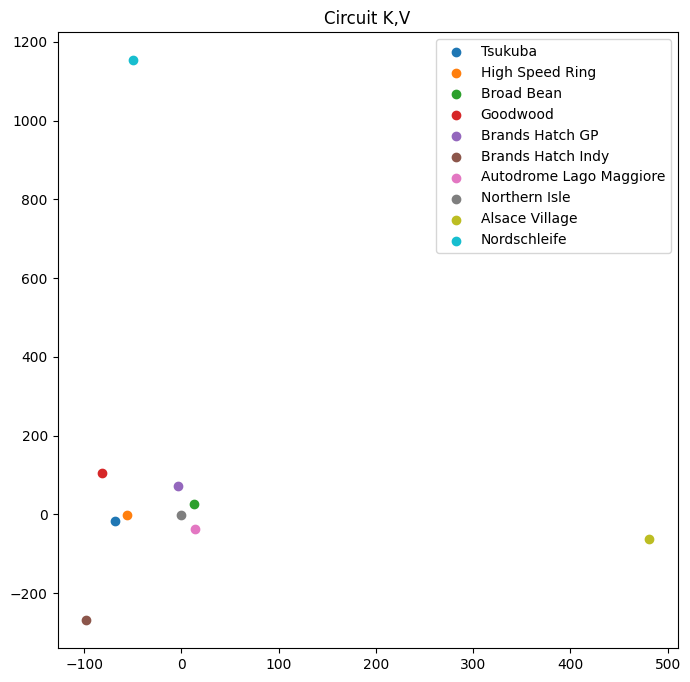

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

plt.title("Circuit K,V")

for k,v in CIRCUITS.items():
    if k in ("Suzuka", "Suzuka East", "Broad Bean Reverse", "High Speed Ring Reverse"):
        continue
    else:
        ax.scatter(
            v['mean'][0],
            v['mean'][1],
            label=k)
plt.legend()
plt.show()